1. Introducción

    En este trabajo práctico final se analizarán los datos de ventas de productos Samsung con tecnología 5G en el periodo 2019-2024. El objetivo principal es identificar los modelos que fueron adoptando la tecnologia y sus diferentes impactos regionales a lo largo del tiempo. 
    
    El análisis permite observar tendencias de adopción del 5G y su distribución en distintas partes del mundo. Se utilizarán herramientas como Python, Pandas y visualizaciones para apoyar los hallazgos.


In [58]:
import pandas as pd
import seaborn as sns
from sqlalchemy import engine
from pandasql import sqldf
import matplotlib.pyplot as plt

df = pd.read_csv('SamsungVentas.csv')


    En esta secccion podemos ver un grafico de los modelos mas vendidos ordenados ascendentemente.

['Año', 'Trimestre', 'Modelo de Producto', 'Capacidad_5G', 'Unidades Vendidas', 'Ingresos ($)', 'Cuota de Mercado (%)', 'Cobertura Regional 5G (%)', 'Suscriptores 5G (millones)', 'Velocidad Promedio 5G (Mbps)', 'Preferencia por 5G (%)', 'Región']


C:\Users\Michelle\AppData\Local\Temp\ipykernel_16040\2058688434.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_agrupado, x=columna_modelo, y=columna_ventas,


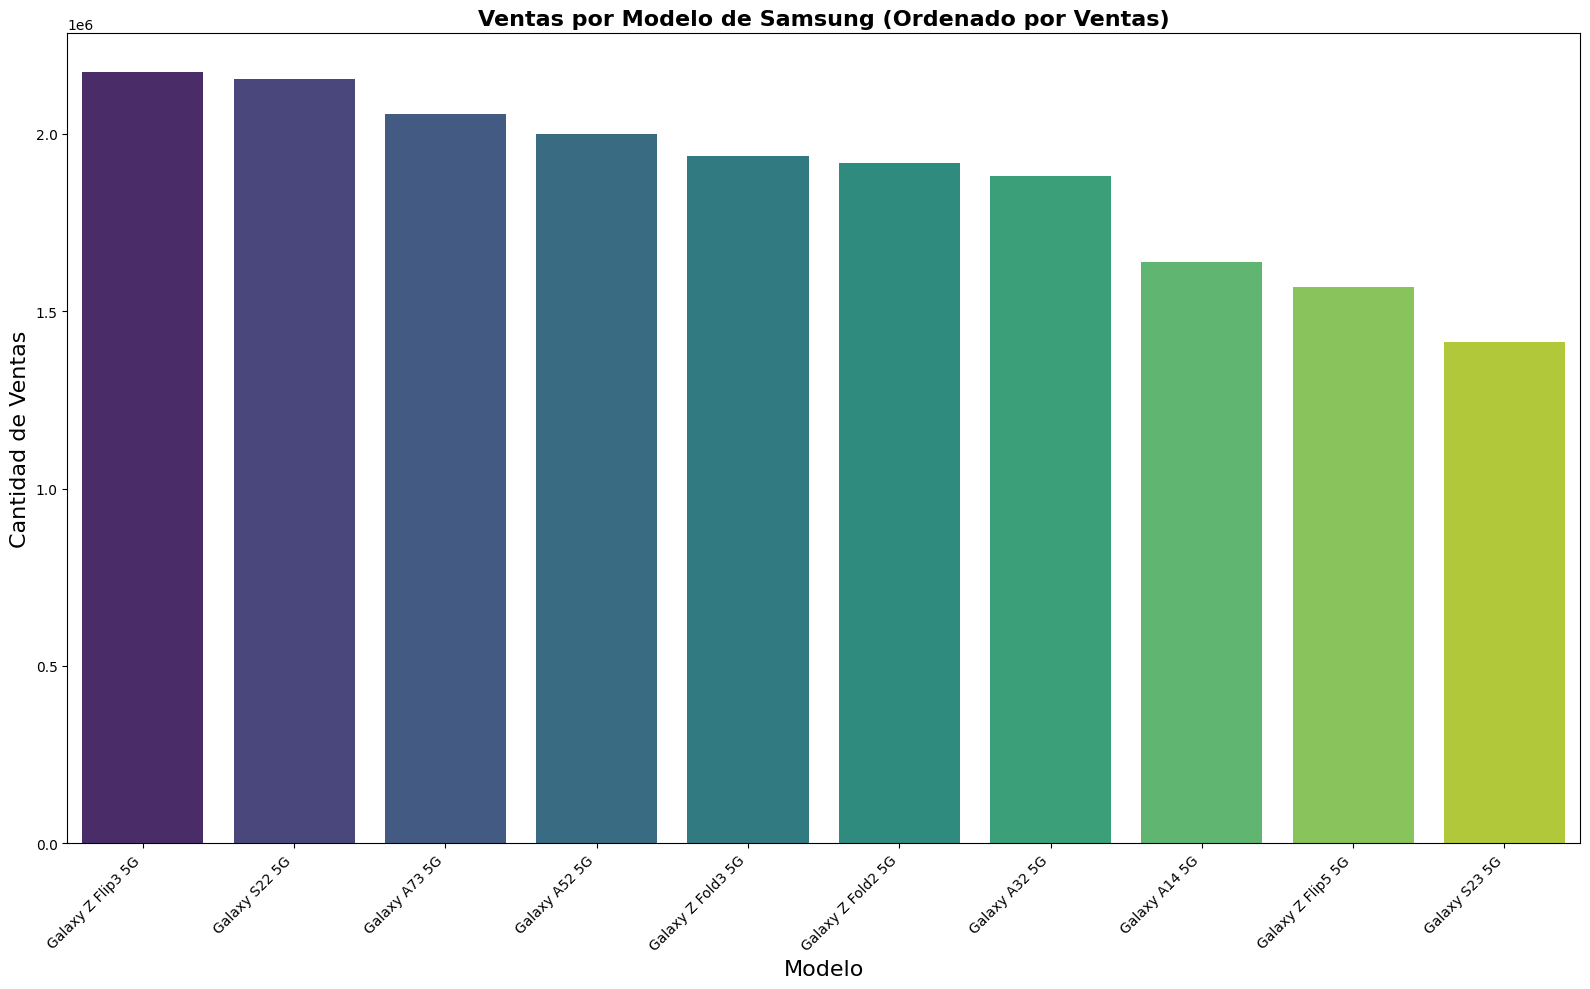

In [62]:

# Ajusta estos nombres según tus columnas reales
columna_modelo = 'Modelo de Producto'  # Cambia por el nombre real de tu columna
columna_ventas = 'Unidades Vendidas'  # Cambia por el nombre real de tu columna

# Si no estás seguro de los nombres, descomenta esta línea:
print(df.columns.tolist())

# Agrupar por modelo y sumar las ventas
ventas_por_modelo = df.groupby(columna_modelo)[columna_ventas].sum().sort_values(ascending=False)

# Alternativa usando seaborn (más moderno)
plt.figure(figsize=(16, 10))
df_agrupado = df.groupby(columna_modelo)[columna_ventas].sum().reset_index()
df_agrupado = df_agrupado.sort_values(columna_ventas, ascending=False)

sns.barplot(data=df_agrupado, x=columna_modelo, y=columna_ventas, 
            palette='viridis', order=df_agrupado[columna_modelo])
plt.title('Ventas por Modelo de Samsung (Ordenado por Ventas)', fontsize=16, fontweight='bold')
plt.xlabel('Modelo', fontsize=16)
plt.ylabel('Cantidad de Ventas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


En este grafico vamos a mostrar los datos con los que vamos a trabajar, que cumplen las siguiente caractetistica, contar con tecnologia 5G. 

C:\Users\Michelle\AppData\Local\Temp\ipykernel_16040\3326902577.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_agrupado, x=columna_modelo, y=columna_ventas,


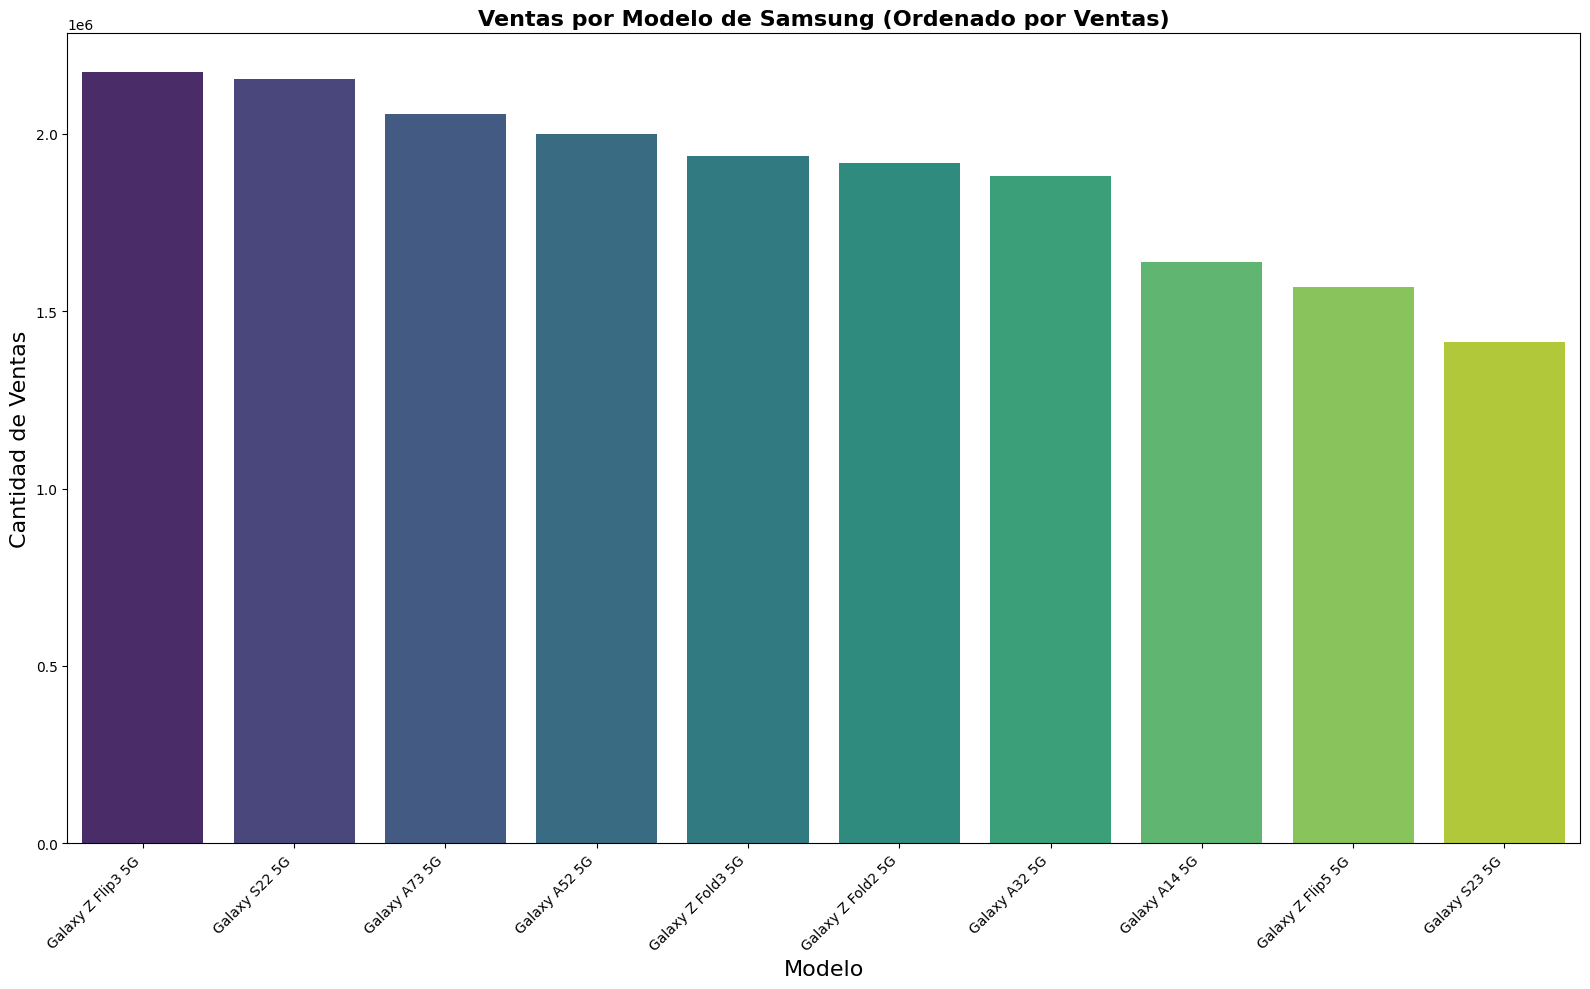

In [60]:
query = "SELECT * FROM df WHERE Capacidad_5G = 'Yes'"
df = sqldf(query, locals())
# Alternativa usando seaborn (más moderno)
plt.figure(figsize=(16, 10))
df_agrupado = df.groupby(columna_modelo)[columna_ventas].sum().reset_index()
df_agrupado = df_agrupado.sort_values(columna_ventas, ascending=False)

sns.barplot(data=df_agrupado, x=columna_modelo, y=columna_ventas, 
            palette='viridis', order=df_agrupado[columna_modelo])
plt.title('Ventas por Modelo de Samsung (Ordenado por Ventas)', fontsize=16, fontweight='bold')
plt.xlabel('Modelo', fontsize=16)
plt.ylabel('Cantidad de Ventas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
query = "SELECT * FROM df WHERE Capacidad_5G = 'Yes'"
df = sqldf(query, locals())
# Alternativa usando seaborn (más moderno)
plt.figure(figsize=(16, 10))
df_agrupado = df.groupby(columna_modelo)[columna_ventas].sum().reset_index()
df_agrupado = df_agrupado.sort_values(columna_ventas, ascending=False)

sns.barplot(data=df_agrupado, x=columna_modelo, y=columna_ventas, 
            palette='viridis', order=df_agrupado[columna_modelo])
plt.title('Ventas por Modelo de Samsung (Ordenado por Ventas)', fontsize=16, fontweight='bold')
plt.xlabel('Modelo', fontsize=16)
plt.ylabel('Cantidad de Ventas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()